<a href="https://colab.research.google.com/github/kaneelgit/stock-data/blob/main/stock_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 50 kB/s 
     |████████████████████████████████| 459 kB 40.3 MB/s 
     |████████████████████████████████| 20.1 MB 64.8 MB/s 
     |████████████████████████████████| 2.9 MB 35.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.0+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.1 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

Checking out files: 100% (2554/2554), done.


In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 8.2 MB 5.5 MB/s 
     |████████████████████████████████| 206 kB 33.7 MB/s 
     |████████████████████████████████| 15.7 MB 331 kB/s 
     |████████████████████████████████| 280 kB 48.1 MB/s 
     |████████████████████████████████| 99 kB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 354 kB/s 
     |████████████████████████████████| 234 kB 50.8 MB/s 
     |████████████████████████████████| 4.2 MB 39.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 352 kB 50.4 MB/s 
     |████████████████████████████████| 1.2 MB 29.5 MB/s 
     |████████████████████████████████| 11.2 MB 36.8 MB/s 
     |████████████████████████████████| 47.8 MB 1.4 MB/s 
     |████████████████████████████████| 596 kB 43.8 MB/s 
     |████████████████████████████████| 4.3 MB 35.1 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |██████████████

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
#get csv file
df = pd.read_csv('https://raw.githubusercontent.com/kaneelgit/stock-data/main/dataset_news.csv')

#delete the unnamed column
del df['Unnamed: 0']
df.head(5)

,NEWS,DATE,TICKER,SP1,SP2,SP5,SP10,W1_2,W2_2,W5_2,W10_2,W1_5,W1_10,W2_5,W2_10,W5_5,W5_10,W10_5,W10_10
0,City's deal with Loews rides wave of Mid-South...,2020-03-11 15:43:00,L,39.73,37.01,33.42,31.26,0,0,0,0,0,0,0,0,0,0,0,0
1,"Engine No 1, the giant-killing hedge fund, has...",2021-06-02 20:00:00,XOM,61.18,61.45,61.05,61.05,1,1,1,1,0,0,0,0,0,0,0,0
2,Is Target Unstoppable After Another Big Earnin...,2021-05-25 10:36:00,TGT,225.30,227.37,227.27,231.34,1,1,1,1,1,2,1,2,1,1,1,1
3,Tesla champion Ark Investment outguns Wall Str...,2021-01-31 19:00:00,STT,70.25,71.60,74.77,72.92,2,1,1,1,2,2,2,2,2,1,1,1
4,Here's Why NVIDIA Stock Jumped Today,2021-05-28 19:28:00,NVDA,649.78,650.58,678.79,704.76,1,1,1,1,2,2,2,2,1,2,1,1


In [3]:
#df new
df2 = df[['NEWS', 'W5_10']]

# #change values
def change_target(x):
  if x == 2:
    x = 1
  
  return x

# df2['target'] = df2['W5_10'].apply(change_target)

# #new dataframe
# data = df2[['NEWS', 'target']]


# #Plot
# plt.plot('gains and losses after ')

data = df2[(df2['W5_10'] == 0) | (df2['W5_10'] == 2)].reset_index(drop = True)
data['target'] = data['W5_10'].apply(change_target)
dataset = data[['NEWS', 'target']]
# plt.figure()
# dataset['target'].plot(kind = 'hist')
# plt.figure()
# plt.hist(data['target'])

In [4]:
#create tensorflow datasets
train_df, remaining = train_test_split(dataset, random_state = 42, train_size = 0.95, stratify = dataset.target.values)
valid_df, _ = train_test_split(remaining, random_state = 42, train_size = 0.99, stratify = remaining.target.values)

train_df.shape, valid_df.shape

((17803, 2), (928, 2))

In [5]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['NEWS'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['NEWS'].values, valid_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)


tf.Tensor(b'When Should You Buy Ross Stores, Inc. (NASDAQ:ROST)?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [6]:
#getting BERT 

label_list = [0, 1]
max_seq_length = 128
train_batch_size = 32

bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable = True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokernizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [7]:
tokernizer.convert_tokens_to_ids(tokernizer.wordpiece_tokenizer.tokenize('This stock is too expensive'))

[100, 4518, 2003, 2205, 6450]

In [8]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokernizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a = text.numpy(),
                                             text_b = None,
                                             label = label.numpy())

  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [9]:
def to_feature_map(text, label):

  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp = [text, label],
                                                                Tout = [tf.int32, tf.int32, tf.int32, tf.int32])
  
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask, 
       'input_type_ids': segment_ids
  }

  return (x, label_id)

In [10]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  

  # valid
  valid_data = (valid_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))

In [11]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [12]:
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [13]:
# Building the model
def create_model():

  input_word_ids = tf.keras.layers.Input(shape = (max_seq_length,), dtype = tf.int32,
                                         name = 'input_word_ids')
  input_mask = tf.keras.layers.Input(shape = (max_seq_length, ), dtype = tf.int32,
                                     name = 'input_mask')
  input_type_ids = tf.keras.layers.Input(shape = (max_seq_length, ), dtype = tf.int32,
                                      name = 'segment_ids')
  
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(drop)

  model = tf.keras.Model(
      inputs = {
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids
      },
      outputs = output)
  
  return model

In [14]:
model = create_model()
model.compile(optimizer  = tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [15]:
epochs = 4
history = model.fit(train_data, validation_data = valid_data, epochs = epochs, verbose = 1)

Epoch 1/4
556/556 [==============================] - ETA: 0s - loss: 0.6474 - binary_accuracy: 0.6633WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0205s vs `on_test_batch_end` time: 0.4909s). Check your callbacks.


556/556 [==============================] - 846s 2s/step - loss: 0.6474 - binary_accuracy: 0.6633 - val_loss: 0.6282 - val_binary_accuracy: 0.6724
Epoch 2/4
556/556 [==============================] - 842s 2s/step - loss: 0.6033 - binary_accuracy: 0.6826 - val_loss: 0.5733 - val_binary_accuracy: 0.7069
Epoch 3/4
556/556 [==============================] - 842s 2s/step - loss: 0.5243 - binary_accuracy: 0.7383 - val_loss: 0.5910 - val_binary_accuracy: 0.7047
Epoch 4/4
556/556 [==============================] - 842s 2s/step - loss: 0.4198 - binary_accuracy: 0.8045 - val_loss: 0.6655 - val_binary_accuracy: 0.7274


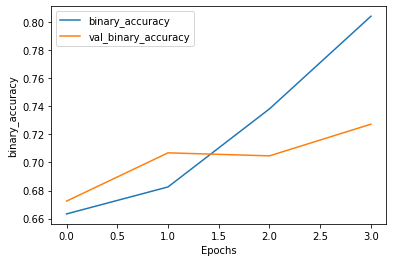

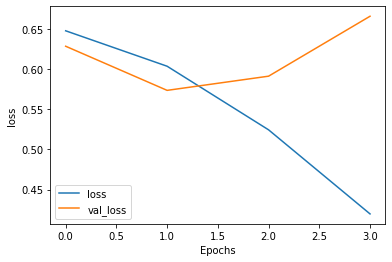

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'binary_accuracy')
plot_graphs(history, 'loss')

In [103]:
sample = [dataset['NEWS'][1]]
sample = ['']

test_data = tf.data.Dataset.from_tensor_slices((sample, [0] * len(sample)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

print(preds)

[[0.73819375]]


In [104]:
model.save('stock_bert')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: stock_bert/assets


INFO:tensorflow:Assets written to: stock_bert/assets


ImportError: ignored

In [107]:
!zip -r /content/stock_bert.zip /content/stock_bert

  adding: content/stock_bert/ (stored 0%)
  adding: content/stock_bert/variables/ (stored 0%)
  adding: content/stock_bert/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/stock_bert/variables/variables.index (deflated 82%)
  adding: content/stock_bert/saved_model.pb (deflated 92%)
  adding: content/stock_bert/assets/ (stored 0%)
  adding: content/stock_bert/assets/vocab.txt (deflated 53%)


In [110]:
from google.colab import files
files.download('/content/stock_bert.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>